In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Exercise 1 

Type I Error: 1 %
Type II Error: 40 %

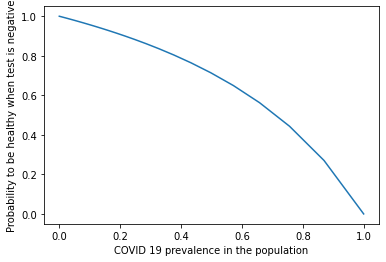

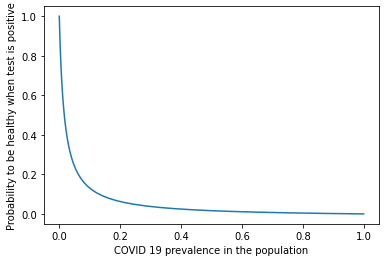

In [4]:
p_pos_cov = 0.6
p_pos_no_cov = 0.01
p_prior_cov = np.logspace(-6, 0, num = 100, base = 10)

p_health_neg = ((1 - p_pos_no_cov) * (1 - p_prior_cov)) / ((1 - p_pos_no_cov) * (1 - p_prior_cov) + (1 - p_pos_cov) * p_prior_cov)
p_health_pos = (p_pos_no_cov * (1 - p_prior_cov)) / (p_pos_no_cov * (1 - p_prior_cov) + p_pos_cov * p_prior_cov)


plt.figure(1)
plt.plot(p_prior_cov, p_health_neg)
plt.xlabel('COVID 19 prevalence in the population')
plt.ylabel('Probability to be healthy when test is negative')

plt.figure(2)
plt.plot(p_prior_cov, p_health_pos)
plt.xlabel('COVID 19 prevalence in the population')
plt.ylabel('Probability to be healthy when test is positive')
plt.show()

In [5]:
def p_poisson(n_obs, lambda_b):
    p_sum = 0
    fact = 1
    for i in range(n_obs):
        if i == 0:
            fact = 1
            p_sum += (lambda_b**i / fact) * np.exp(-lambda_b)
        else:
            fact *= i
            p_sum += (lambda_b**i / fact) * np.exp(-lambda_b)
        
    p = 1 - p_sum
    return p

print('The probability of observing 5 or more events assuming the presence of background only with the expectation value being λ_B = 1.8 is ', p_poisson(5, 1.8))
print('So this is not a significant excess with a confidence level of 3 sigma (99.7 Percent).')


The probability of observing 5 or more events assuming the presence of background only with the expectation value being λ_B = 1.8 is  0.03640666100108336
So this is not a significant excess with a confidence level of 3 sigma (99.7 Percent).


In [6]:
def p_poisson2(n_obs, lambda_s, lambda_b):
    p_sum = 0
    fact = 1
    for i in range(n_obs+1):
        if i == 0:
            fact = 1
            p_sum += ((lambda_s+lambda_b)**i / fact) * np.exp(-(lambda_s+lambda_b))
        else:
            fact *= i
            p_sum += ((lambda_s+lambda_b)**i / fact) * np.exp(-(lambda_s+lambda_b))
        
    return p_sum

n_obs = 5
lambda_b = 1.8
lambda_max = 20
lambda_min = 0
p_max = 1
p_min = 0

while np.abs(p_max - p_min) >= 10**(-5):
    p_max = p_poisson2(n_obs, lambda_max, lambda_b)
    p_min = p_poisson2(n_obs, lambda_min, lambda_b)
    if np.abs((p_max - p_min)) < 10**(-5):
        lambda_s_max = lambda_max
        break
    else:
        if p_poisson2(n_obs, lambda_min + 0.5*(lambda_max-lambda_min), lambda_b) > 0.05:
            lambda_min = lambda_min + 0.5*(lambda_max - lambda_min)
        else:
            lambda_max = lambda_min + 0.5*(lambda_max - lambda_min)
            
print('λ_s_max = ', lambda_s_max)    

λ_s_max =  8.71307373046875


In [7]:
n = 1000000
count = 0
for i in range(n):
    poisson_rand = np.random.poisson(lambda_b+lambda_s_max, size = 1)
    if poisson_rand > n_obs:
        pass
    else:
        count+=1
        
print('The relative frequency of random numbers equal or below n_obs: ', count/n)

The relative frequency of random numbers equal or below n_obs:  0.04998
